# data cleaning code for Covid Data.csv

Description: This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.¶
- [x] USMER: Indicates whether the patient treated medical units of the first, second or third level.
- [x] MEDICAL_UNIT: type of institution of the National Health System that provided the care.
- [x] SEX: female or male
- [x] PATIENT_TYPE: hospitalized or not hospitalized.
- [x] DATE_DIED: indicates whether the patient died or recovered.
- [x] INTUBED: whether the patient was connected to the ventilator.
- [x] PNEUMONIA: whether the patient already have air sacs inflammation or not.
- [x] AGE: of the patient.
- [x] PREGNANT: whether the patient is pregnant or not.
- [x] DIABETES: whether the patient has diabetes or not.
- [x] COPD: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- [x] ASTHMA: whether the patient has asthma or not.
- [x] INMSUPR: whether the patient is immunosuppressed or not.
- [x] HIPERTENSION: whether the patient has hypertension or not.
- [x] OTHER_DISEASE: whether the patient has other disease or not.
- [x] CARDIOVASCULAR: whether the patient has heart or blood vessels related disease.
- [x] OBESITY: whether the patient is obese or not.
- [x] RENAL_CHRONIC: whether the patient has chronic renal disease or not.
- [x] TOBACCO: whether the patient is a tobacco user.
- [x] CLASIFFICATION_FINAL: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- [x] ICU: Indicates whether the patient had been admitted to an Intensive Care Unit.


# Headfiles

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
## SOP 
- Check data integrity  
    - Load raw dataset 
    - Ensure correct datatype 
    - Check shape (rows $\times$ columns)
- Process abnormal values 
    - check missing values
    - check duplicated values
- Label Construction 
        - e.g. 9999-99-99 -> 1(Dead)
- Feature Cleaning and Encoding 
    - binary values e.g. (1/2) -> (1/0)
    - categorical clinical variables -> One-Hot encode  
    - Normalize numerical variables 
- Handling Class Imbalance 
- Dataset Splitting (later)


# 1. Check data integrity 

In [2]:
df = pd.read_csv('Covid Data.csv')
print(df.shape)
print(df.head())

(1048575, 21)
   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1    3/5/2020       97          1   
1      2             1    2             1    3/6/2020       97          1   
2      2             1    2             2    9/6/2020        1          2   
3      2             1    1             1   12/6/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CH

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
for i in df.columns:
    print(f'{i}: {len(np.unique(df[i].values))}')

USMER: 2
MEDICAL_UNIT: 13
SEX: 2
PATIENT_TYPE: 2
DATE_DIED: 401
INTUBED: 4
PNEUMONIA: 3
AGE: 121
PREGNANT: 4
DIABETES: 3
COPD: 3
ASTHMA: 3
INMSUPR: 3
HIPERTENSION: 3
OTHER_DISEASE: 3
CARDIOVASCULAR: 3
OBESITY: 3
RENAL_CHRONIC: 3
TOBACCO: 3
CLASIFFICATION_FINAL: 7
ICU: 4


# 2. Process abnormal data

In [5]:
print(f'Missing values: {df.isna().sum().sum()}')
print(f"Duplicated values: {df.duplicated().sum()}")
# df = df.drop_duplicates()
# print(f'Duplicated values after dropping: {df.duplicated().sum()}')
print(df.shape)

Missing values: 0
Duplicated values: 812049
(1048575, 21)


# 3. Label Construction

In [6]:
print(df.DATE_DIED.value_counts())

DATE_DIED
9999-99-99    971633
6/7/2020        1000
7/7/2020         996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
8/12/2020          1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64


In [7]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]
df = df.drop(columns=['DATE_DIED'])


# 4. Feature Cleaning and Encoding

In [8]:
print(df.USMER.value_counts())

USMER
2    662903
1    385672
Name: count, dtype: int64


In [9]:
print(df.MEDICAL_UNIT.value_counts())

MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64


In [10]:
print(df.SEX.value_counts())

SEX
1    525064
2    523511
Name: count, dtype: int64


In [11]:
print(df.PATIENT_TYPE.value_counts())

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64


In [12]:
print(df.INTUBED.value_counts())
# too much missing values
# df['INTUBED'] = df['INTUBED'].replace(
#     {
#         99:3,
#         97:3
#     }
# )
df = df.drop(columns=['INTUBED'])
print(df.shape)

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64
(1048575, 20)


In [13]:
print(df.PNEUMONIA.value_counts())
df = df[df.PNEUMONIA != 99]
print(df.shape)

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64
(1032572, 20)


In [14]:
print(df.AGE.value_counts())

AGE
30     26667
31     25626
28     24943
29     24794
34     24630
       ...  
118        2
116        2
121        1
111        1
113        1
Name: count, Length: 121, dtype: int64


/var/folders/7c/wbc1mxhj195dq_7p0xd_rfw80000gp/T/ipykernel_70685/3953318340.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Female", "Male"])


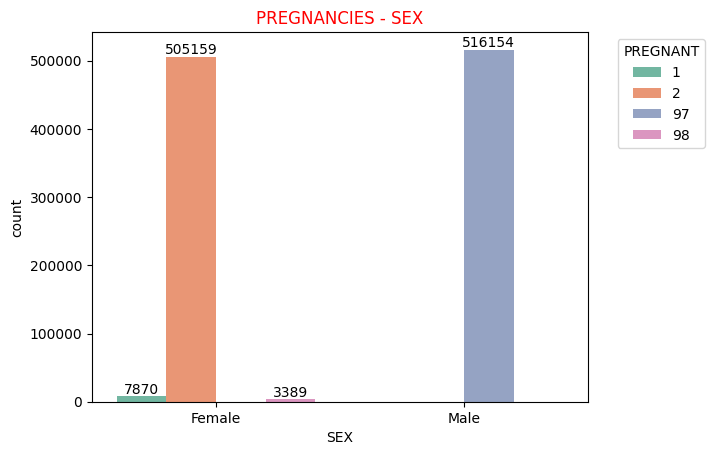

In [15]:
plt.figure()
ax = sns.countplot(
    data=df, x="SEX", hue="PREGNANT",
    palette="Set2"   
)
for bars in ax.containers:
    ax.bar_label(bars)

ax.set_xticklabels(["Female", "Male"])

ax.legend(
    title="PREGNANT",
    loc="upper right",
    bbox_to_anchor=(1.25, 1) 
)

plt.title("PREGNANCIES - SEX", color="red");
df['PREGNANT'] = df['PREGNANT'].replace(
    {
        97:2,
        98:2
    }
)

In [16]:
print(df.DIABETES.value_counts())
df = df[df['DIABETES']!=98]
print(df.shape)

DIABETES
2     905856
1     123395
98      3321
Name: count, dtype: int64
(1029251, 20)


In [17]:
print(df.COPD.value_counts())
df = df[df['COPD']!=98]
print(df.shape)

COPD
2     1014380
1       14507
98        364
Name: count, dtype: int64
(1028887, 20)


In [18]:
print(df.ASTHMA.value_counts())
df = df[df['ASTHMA']!=98]
print(df.shape)

ASTHMA
2     998084
1      30623
98       180
Name: count, dtype: int64
(1028707, 20)


In [19]:
print(df.INMSUPR.value_counts())
df = df[df['INMSUPR']!=98]
print(df.shape)

INMSUPR
2     1014482
1       13717
98        508
Name: count, dtype: int64
(1028199, 20)


In [20]:
print(df.HIPERTENSION.value_counts())
df = df[df['HIPERTENSION']!=98]
print(df.shape)

HIPERTENSION
2     867697
1     160278
98       224
Name: count, dtype: int64
(1027975, 20)


In [21]:
print(df.OTHER_DISEASE.value_counts())
df = df[df['OTHER_DISEASE']!=98]
print(df.shape)

OTHER_DISEASE
2     998991
1      27182
98      1802
Name: count, dtype: int64
(1026173, 20)


In [22]:
print(df.CARDIOVASCULAR.value_counts())
df = df[df['CARDIOVASCULAR']!=98]
print(df.shape)

CARDIOVASCULAR
2     1005884
1       20156
98        133
Name: count, dtype: int64
(1026040, 20)


In [23]:
print(df.OBESITY.value_counts())
df = df[df['OBESITY']!=98]
print(df.shape)

OBESITY
2     868516
1     157142
98       382
Name: count, dtype: int64
(1025658, 20)


In [24]:
print(df.RENAL_CHRONIC.value_counts())
df = df[df['RENAL_CHRONIC']!=98]
print(df.shape)

RENAL_CHRONIC
2     1007142
1       18375
98        141
Name: count, dtype: int64
(1025517, 20)


In [25]:
print(df.TOBACCO.value_counts())
df = df[df['TOBACCO']!=98]
print(df.shape)

TOBACCO
2     942477
1      82675
98       365
Name: count, dtype: int64
(1025152, 20)


In [26]:
print(df.CLASIFFICATION_FINAL.value_counts())
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].replace(
    {
        1:1,
        2:1,
        3:1,
        4:2,
        5:2,
        6:2,
        7:2
    }
)

CLASIFFICATION_FINAL
7    490123
3    378629
6    117756
5     25305
1      8448
4      3090
2      1801
Name: count, dtype: int64


In [27]:
print(df.ICU.value_counts())
df = df.drop(columns=['ICU'])
print(df.shape)

ICU
97    833253
2     173154
1      16434
99      2311
Name: count, dtype: int64
(1025152, 19)


In [28]:
print(df.shape)

(1025152, 19)


# 5. Handling Class Imbalance

In [29]:
print(df['DEATH'].value_counts())
print(df['DEATH'].value_counts(normalize=True))  
# no need to do extra balancing now, save the data 
df.to_csv("covid_cleaned.csv", index=False)

DEATH
2    950438
1     74714
Name: count, dtype: int64
DEATH
2    0.927119
1    0.072881
Name: proportion, dtype: float64


# 6. Feature Selection

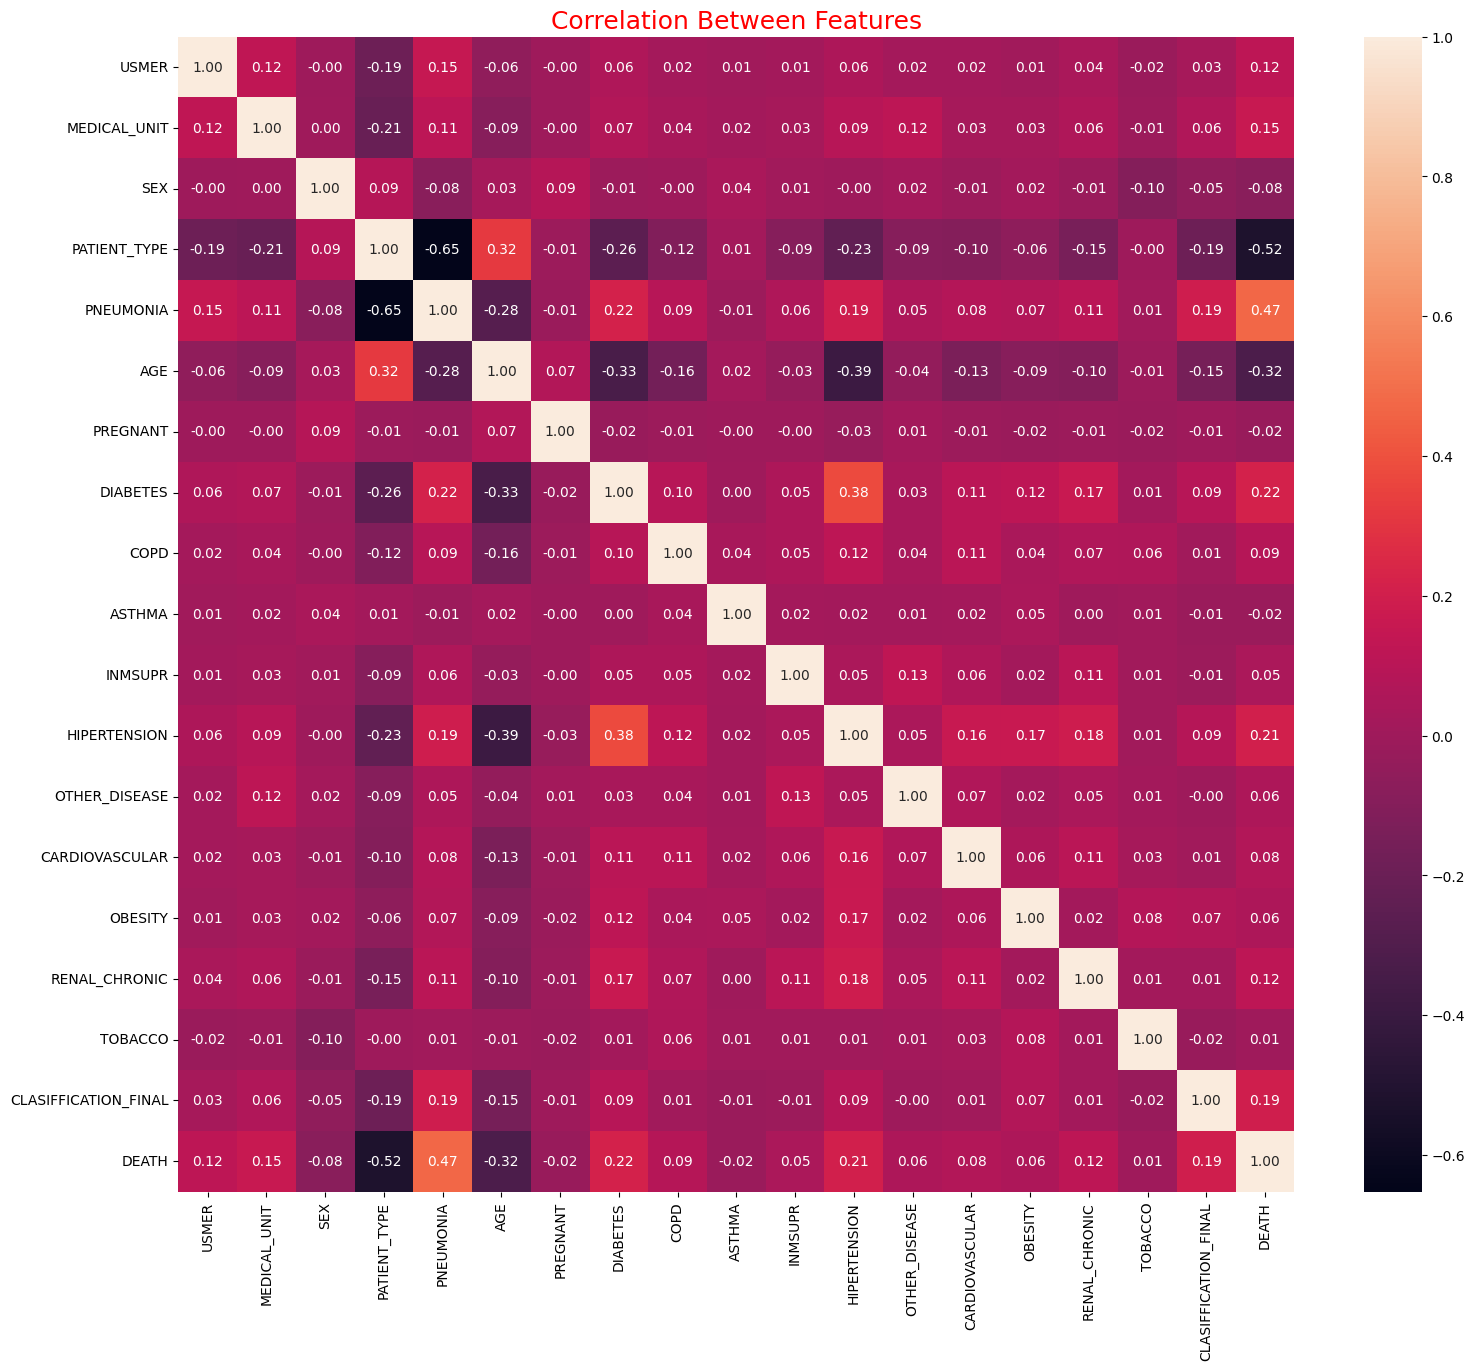

In [31]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

In [32]:
# drop unrelevant columns with DEATH
unrelevant_columns = [
    "SEX","PREGNANT","COPD","ASTHMA","INMSUPR",
    "OTHER_DISEASE","CARDIOVASCULAR","OBESITY","TOBACCO"
]
df = df.drop(columns=unrelevant_columns)
print(df.columns)

Index(['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'DIABETES',
       'HIPERTENSION', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')


In [34]:
# save the cleaned data 
df.to_csv('covid_cleaned.csv', index=False, encoding='utf-8')